# PDF einlesen

In [ ]:
# pdf einlesen

# Ziel: die 83 pdf einlesen, auslesen:

# Spalten: 1. Seriennummer, 2. Datum, 3. Inhalttext

#Liste aller Dateien erstellen, mit Hilfe der Liste alle Dateien einlesen, Dic kreieren
#



In [2]:
# Liste der Files

import os
import pandas as pd

In [3]:
filelist = os.listdir("pdfs")

In [7]:
filelist[0]

'Vk_20180226_08documents0.pdf'

In [8]:
# 1 File einlesen (bevor wir eine Schlaufe bauen)

!pip3 install PyPDF2

    100% |████████████████████████████████| 81kB 193kB/s ta 0:00:01
  Running setup.py bdist_wheel for PyPDF2 ... done
  Stored in directory: /Users/priskawa/Library/Caches/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [10]:
import PyPDF2

In [12]:
file = open('pdfs/'+filelist[0], "rb")
fileReader = PyPDF2.PdfFileReader(file)
print(fileReader.numPages)

2


In [13]:
fileReader

In [16]:
file.read()

b'\r\nendobj\r\n24 0 obj\r\n<</Filter/FlateDecode/Length 3921>>\r\nstream\r\nx\x9c\xed\x1b\xcbr\xdbF\xf2\xee*\xff\x03\x8e\xe4\xc6\x82\xe6\r\xc0\xe5b\xadDK\x8e\x93\xd5\xda\xb1\x95\xa46v\x0e\x90\x08Q\xdc\xc8\xa4\x16\x86\x92M\xfeh\xbf*\x17\x7fCN>lw\xcf\xe01\x10\x07\x80\xb6r\xdcR\x89\x04\x81\xe9\xc7\xf4\xf4{\x06\x87Ge\xb5\xb9\xca/\xab\xe8\xd9\xb3\xc3\xa3\xaa\xca/\xaf\x8bU\xf4\xee\xf0|w\xfb\xe3\xe1\xf9\xaf\xb7\xc5\xe1\xeb|\xbd\xd9\xe6\xd5f\xb7],\xa2\xe3\xe7\xcb\xe8\xf8\xfc\xf1\xa3\xc3S\x1eeqf\xa2\xf3\xab\xc7\x8fx\xc4\xe0\x8fG\t\x8b3\xa5\xa2$\x15q\x9aF\xe7\x1f`\xd8\x8b\xb7BG\xeb\x8f\x8f\x1f\xb1h\x8d\x1f/\x1e?z7\x8b\xe6?F\xe7_=~t\x02\x88,2q\x1f\x99Jy\x9cuqE,f\x89I\xa2\xf3\xcbw\xb3\xdb|]\xdcC\xb2\x87#\xcd\xd28I},\x84\xa0\xcfB\x03\xc0y\xac\xbd)\xbc\x9b\x89\xe0\xd8$f\xc6\x1f;ij\x9agq*Bs\xdb]M\x9a\x99d\xb1~\xc8\xc4\xa4\x8c\x85\x9981\xd9\x97Z\x18o\xbd\xe6\xf0\xad\xc5\x9e\xb1\xd1\xc9\xd92:\x0c(\xd9\xf1\xae\xaav\x1fBz\xc6#$R\x82\xde\x08ib)A%b\x0e\xb4\xb8Lb\x9eF\x9c\xc5iT\x16\x8f\x1f]\xfd\xa5#\xa7}\n

In [17]:
! pip install textract

  Using cached https://files.pythonhosted.org/packages/7e/5c/605ca2daa5cf21c87690d8fe6ab05a6f2278c451f4ede6456dd26453f4bd/chardet-2.3.0-py2.py3-none-any.whl
requests 2.19.1 has requirement chardet<3.1.0,>=3.0.2, but you'll have chardet 2.3.0 which is incompatible.
  Found existing installation: chardet 3.0.4
    Uninstalling chardet-3.0.4:
      Successfully uninstalled chardet-3.0.4


In [18]:
import textract

In [33]:
byts = textract.process("pdfs/Vk_20180226_08documents0.pdf", method="pdfminer", encoding="ascii")
text = byts.decode("ascii").replace("\n","")

In [34]:
text

'   Cook Medical Europe OHalloran Road, National Technological Park, Limerick, Ireland. Phone: + 353 61 334440 Fax: + 353 61 334441         Dringende Mitteilung: COOK COOKSicherheitsrelevante Korrektive Manahme im Feld  Handelsname des betroffenen Produktes: Endovaskulre iliakale Bifurkationsprothese Zenith Branch (ZBIS)  Hersteller:  William A. Cook Australia Pty Ltd  Cook-Referenznummer: 2018FA0002, QCR-83   Art der Manahme:  Sicherheitsrelevante korrektive Massnahme ---------------------------------------------------------------------------------------------------------------------------  Datum: 15. Februar 2018  Zu Hnden: Geschftsfhrung / Risikomanagement / Einkaufsabteilung / Krankenpflege-Direktion   Details zum betroffenen Produkt:  Produkt-Markenname Artikelnummer (RPN) GPN Lotnummern ZBIS-12-61-58 ZBIS-12-61-41 ZBIS-12-45-58 ZBIS-12-45-41 ZBIS-10-61-41 ZBIS-10-45-41 G38344 G38618 G38617 G38616 G38614 G38612 Please see the included listing for the specific lot numbers that are 

In [38]:
! pip install progressbar2

In [41]:
import progressbar

In [42]:
newlst = []
bar = progressbar.ProgressBar()

progresslist = range(len(filelist))

for file,b in zip(filelist,bar(progresslist)):
    try:
        byts = textract.process("pdfs/"+ file, method="pdfminer", encoding="ascii")
        text = byts.decode("ascii").replace("\n","")
    
        mini_dict={"Filename":file,
                  "Text":text}
    
        newlst.append(mini_dict)
    except:
        mini_dict={"Filename":file,
                  "Text":"Fehlermeldung"}
        newlst.append(mini_dict)
    

 98% (81 of 82) |####################### | Elapsed Time: 0:02:15 ETA:   0:00:01

In [46]:
#newlst

In [43]:
pd.DataFrame(newlst)

,Filename,Text
0,Vk_20180226_08documents0.pdf,"Cook Medical Europe OHalloran Road, Nationa..."
1,Vk_20180226_08documents1.pdf,COOK Avis Urgent de Scurit COOK Medi...
2,Vk_20180226_08documents2.pdf,"Cook Medical Europe OHalloran Road, ..."
3,Vk_20180326_03documents0.pdf,"Siemens Healthcare SA, 8047 Zurich, Suisse ..."
4,Vk_20180413_17documents0.pdf,"Drger Schweiz AG, CH-3097 Liebefeld An unsere ..."
5,Vk_20180413_17documents1.pdf,"Drger Schweiz AG, CH-3097 Liebefeld An unsere ..."
6,Vk_20180413_17documents2.pdf,"Drger Schweiz AG, CH-3097 Liebefeld lattentio..."
7,Vk_20180413_17documents3.pdf,"Drger Schweiz AG, CH-3097 Liebefeld lattentio..."
8,Vk_20180417_10documents0.pdf,"Cook Medical Europe OHalloran Road, Nationa..."
9,Vk_20180417_10documents1.pdf,COOK Avis Urgent de Scurit COOK Medi...


In [44]:
byts = textract.process("pdfs/Vk_20180516_14documents1.pdf", method="tesseract", encoding="ascii")
text = byts.decode("ascii").replace("\n","")
text

"SIEMENS.Healthineers Siemens Shanghai Medical Equipment Ltd., HC DI CT QT CN Name Mr. Lu ZhiNo. 278 Zhou Zhu Rd, Pudong New Area, Shanghai P.R.China Department HC DICT QT CNTo all users of the Telephone +86 21 3889 5158E-mail zhi.lu@siemens-healthineers.comSIEMENS SOMATOM go.UpDate 09.04.2018SIEMENS SOMATOM go.NowSafety Advisory Notice CT013/18/SCustomer Safety Advisory Notice CT013/18/SRe: SOMATOM go.Up and SOMATOM go.Now - Risk: Patient rescan might become necessaryDear customer:This letter is to inform you about the potential risk of a patient rescan due to 3 sporadic software issues.When does the malfunction occur and what is the problem?Topic 1: We have observed sporadic software stability problems preventing the start of a reconstruction afterthe CT examination. If these problems occur, this is indicated by a red cross in the Job Status table (seeexample in Fig. 1 on page 2).Topic 2: We have become aware of very sporadic problems with an impact on image quality. If the detector 

In [47]:
newlst = []
bar = progressbar.ProgressBar()
progresslist = range(len(filelist))

for file,b in zip(filelist,bar(progresslist)):
    try:
        byts = textract.process("pdfs/" + file, method="pdfminer", encoding="ascii")
        text = byts.decode("ascii").replace("\n","")
        
        if len(text)<40:
            byts = textract.process("pdfs/" + file, method="tesseract", encoding="ascii")
            text = byts.decode("ascii").replace("\n","")
    
        mini_dict={"Filename":file,
                  "Text":text}
    
        newlst.append(mini_dict)
    except:
        mini_dict={"Filename":file,
                  "Text":"Fehlermeldung"}
        
        newlst.append(mini_dict)
    

 98% (81 of 82) |####################### | Elapsed Time: 0:04:02 ETA:   0:00:00

In [49]:
df = pd.DataFrame(newlst)

In [50]:
df

,Filename,Text
0,Vk_20180226_08documents0.pdf,"Cook Medical Europe OHalloran Road, Nationa..."
1,Vk_20180226_08documents1.pdf,COOK Avis Urgent de Scurit COOK Medi...
2,Vk_20180226_08documents2.pdf,"Cook Medical Europe OHalloran Road, ..."
3,Vk_20180326_03documents0.pdf,"Siemens Healthcare SA, 8047 Zurich, Suisse ..."
4,Vk_20180413_17documents0.pdf,"Drger Schweiz AG, CH-3097 Liebefeld An unsere ..."
5,Vk_20180413_17documents1.pdf,"Drger Schweiz AG, CH-3097 Liebefeld An unsere ..."
6,Vk_20180413_17documents2.pdf,"Drger Schweiz AG, CH-3097 Liebefeld lattentio..."
7,Vk_20180413_17documents3.pdf,"Drger Schweiz AG, CH-3097 Liebefeld lattentio..."
8,Vk_20180417_10documents0.pdf,"Cook Medical Europe OHalloran Road, Nationa..."
9,Vk_20180417_10documents1.pdf,COOK Avis Urgent de Scurit COOK Medi...


In [51]:
test = "Vk_20180530_11documents2.pdf"

In [85]:
test

'Vk_20180530_11documents2.pdf'

In [86]:
test.split("_")[1]

'20180530'

In [87]:
def date(elem):
    return elem.split("_")[1]

In [88]:
date(test)

'20180530'

In [89]:
df["Date"] = df["Filename"].apply(date)

In [90]:
df

,Filename,Text,Date
Date,,,
2018-02-26,Vk_20180226_08documents0.pdf,"Cook Medical Europe OHalloran Road, Nationa...",20180226
2018-02-26,Vk_20180226_08documents1.pdf,COOK Avis Urgent de Scurit COOK Medi...,20180226
2018-02-26,Vk_20180226_08documents2.pdf,"Cook Medical Europe OHalloran Road, ...",20180226
2018-03-26,Vk_20180326_03documents0.pdf,"Siemens Healthcare SA, 8047 Zurich, Suisse ...",20180326
2018-04-13,Vk_20180413_17documents0.pdf,"Drger Schweiz AG, CH-3097 Liebefeld An unsere ...",20180413
2018-04-13,Vk_20180413_17documents1.pdf,"Drger Schweiz AG, CH-3097 Liebefeld An unsere ...",20180413
2018-04-13,Vk_20180413_17documents2.pdf,"Drger Schweiz AG, CH-3097 Liebefeld lattentio...",20180413
2018-04-13,Vk_20180413_17documents3.pdf,"Drger Schweiz AG, CH-3097 Liebefeld lattentio...",20180413
2018-04-17,Vk_20180417_10documents0.pdf,"Cook Medical Europe OHalloran Road, Nationa...",20180417


In [91]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y%m%d")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2018-02-26 to 2018-05-30
Data columns (total 3 columns):
Filename    82 non-null object
Text        82 non-null object
Date        82 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 5.1+ KB


In [93]:
df.index = df["Date"]

In [94]:
df.head()

,Filename,Text,Date
Date,,,
2018-02-26,Vk_20180226_08documents0.pdf,"Cook Medical Europe OHalloran Road, Nationa...",2018-02-26
2018-02-26,Vk_20180226_08documents1.pdf,COOK Avis Urgent de Scurit COOK Medi...,2018-02-26
2018-02-26,Vk_20180226_08documents2.pdf,"Cook Medical Europe OHalloran Road, ...",2018-02-26
2018-03-26,Vk_20180326_03documents0.pdf,"Siemens Healthcare SA, 8047 Zurich, Suisse ...",2018-03-26
2018-04-13,Vk_20180413_17documents0.pdf,"Drger Schweiz AG, CH-3097 Liebefeld An unsere ...",2018-04-13


In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

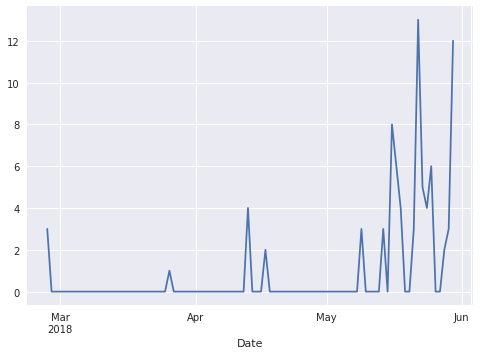

In [106]:
df.resample("D")["Filename"].count().plot()

In [102]:
df["Implant"] = df["Text"].str.contains("implant")

In [103]:
df.head()

,Filename,Text,Date,Implant
Date,,,,
2018-02-26,Vk_20180226_08documents0.pdf,"Cook Medical Europe OHalloran Road, Nationa...",2018-02-26,False
2018-02-26,Vk_20180226_08documents1.pdf,COOK Avis Urgent de Scurit COOK Medi...,2018-02-26,False
2018-02-26,Vk_20180226_08documents2.pdf,"Cook Medical Europe OHalloran Road, ...",2018-02-26,False
2018-03-26,Vk_20180326_03documents0.pdf,"Siemens Healthcare SA, 8047 Zurich, Suisse ...",2018-03-26,False
2018-04-13,Vk_20180413_17documents0.pdf,"Drger Schweiz AG, CH-3097 Liebefeld An unsere ...",2018-04-13,False


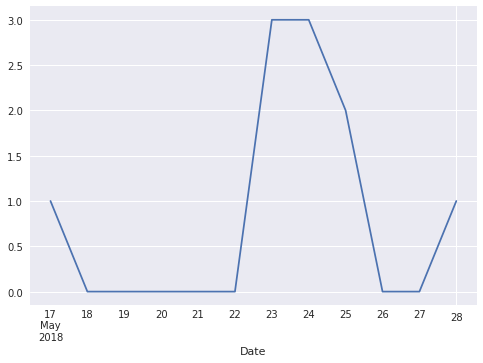

In [108]:
df[df["Implant"] == True].resample("D")["Filename"].count().plot()
plt.savefig("implantat.pdf")

In [109]:
!ls

Pdf einlesen Übung.ipynb   pdfs
implantat.pdf
